In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import copy

vir = copy(mpl.cm.viridis)
vir.set_under("lightgray")

sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(figsize = [12,10],dpi =100, facecolor='white')

In [ ]:
adata = sc.read_h5ad('AP_CONTROL_BRN12.h5ad')
adata = adata[adata.obs['Batch']!=1,:]
adata.var_names_make_unique()

adata.layers['plot'] = np.log1p(adata.X)
adata.layers['count'] = adata.X.copy()

adata.obs['Batch'] = adata.obs['Batch'].astype('category')
adata.obs['age.x'] = adata.obs['age.x'].astype('category')

adata.obs['pseudotime'] = pd.read_csv('ct_pseudotime.csv')['pseudotime'].to_list()

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.gam.api import GLMGam, BSplines

In [4]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [5]:
wave = pd.read_excel('Telley_wave_V2_reference.xlsx')
gene = list(set(wave['Gene symbol']).intersection(set(adata.var_names)))

In [6]:
wave = wave[wave['Gene symbol'].isin(gene)]

In [7]:
d = pd.DataFrame(adata[:,gene].layers['plot'].todense())
d.columns = gene
d['pseudotime'] = adata.obs['pseudotime'].to_list()
d = d.sort_values(by = 'pseudotime')

In [8]:
from scipy.interpolate import UnivariateSpline

In [9]:
d_new = []
for i in gene:
    spl = UnivariateSpline(d['pseudotime'], d[i],k=2,bbox = [-0.1,1.1])
    fit = spl(d['pseudotime'])
    #fit = (fit - fit.mean())/abs((fit-fit.mean())).max()
    fit = (fit - (fit.max()+fit.min())/2)/(fit.max()-fit.min())*2
    d_new.append(fit)

In [10]:
d_new = pd.DataFrame(d_new).T
d_new.columns = gene

./Telley wave/plot2/CT_W1.pdf
./Telley wave/plot2/CT_W2.pdf
./Telley wave/plot2/CT_W3.pdf
./Telley wave/plot2/CT_W4.pdf
./Telley wave/plot2/CT_W5.pdf
./Telley wave/plot2/CT_W6.pdf


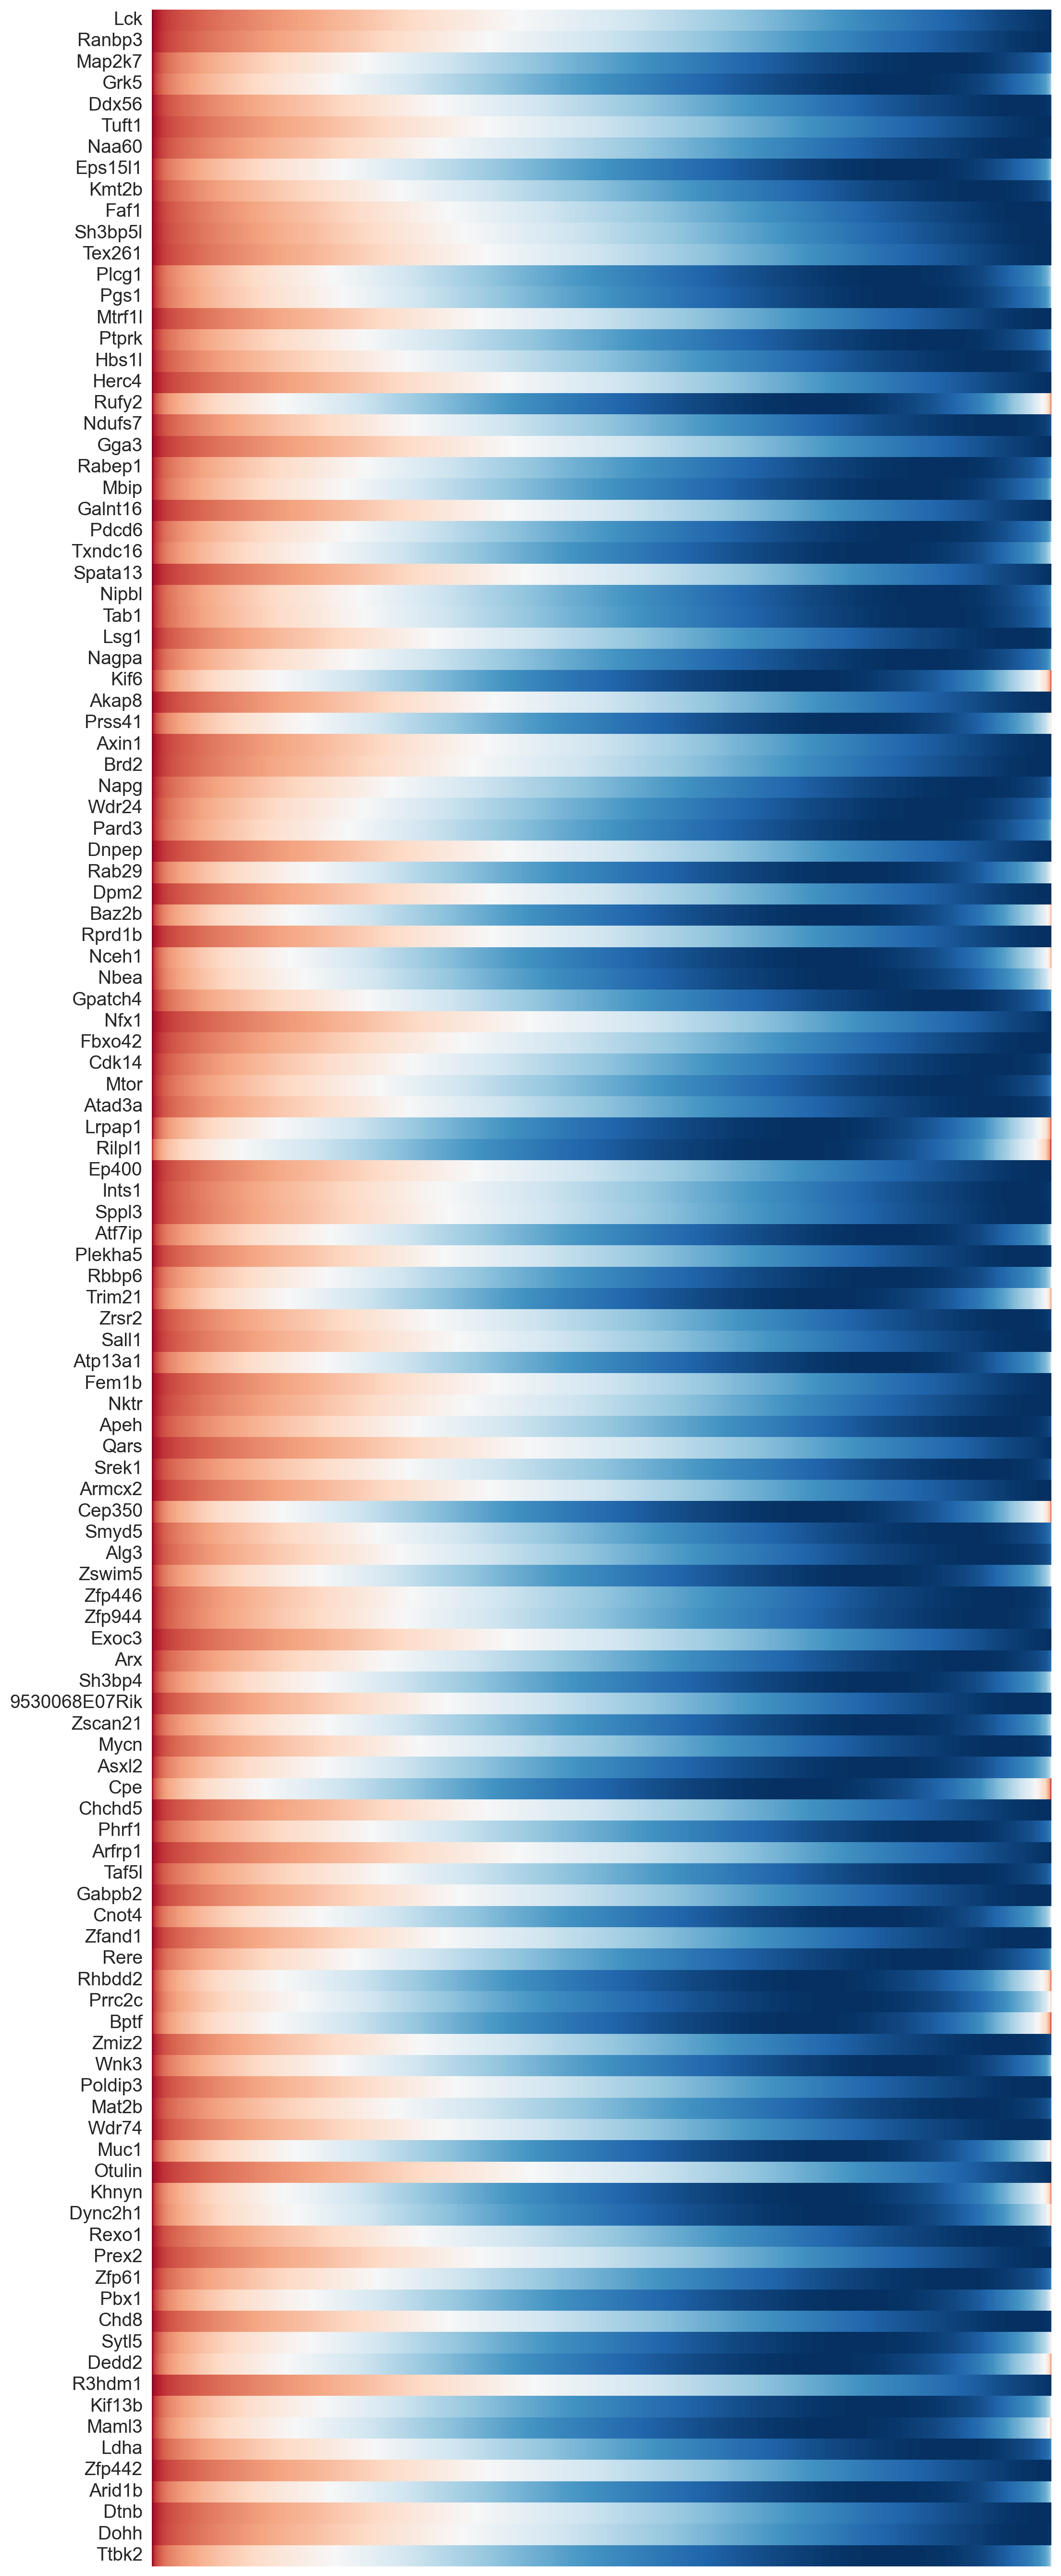

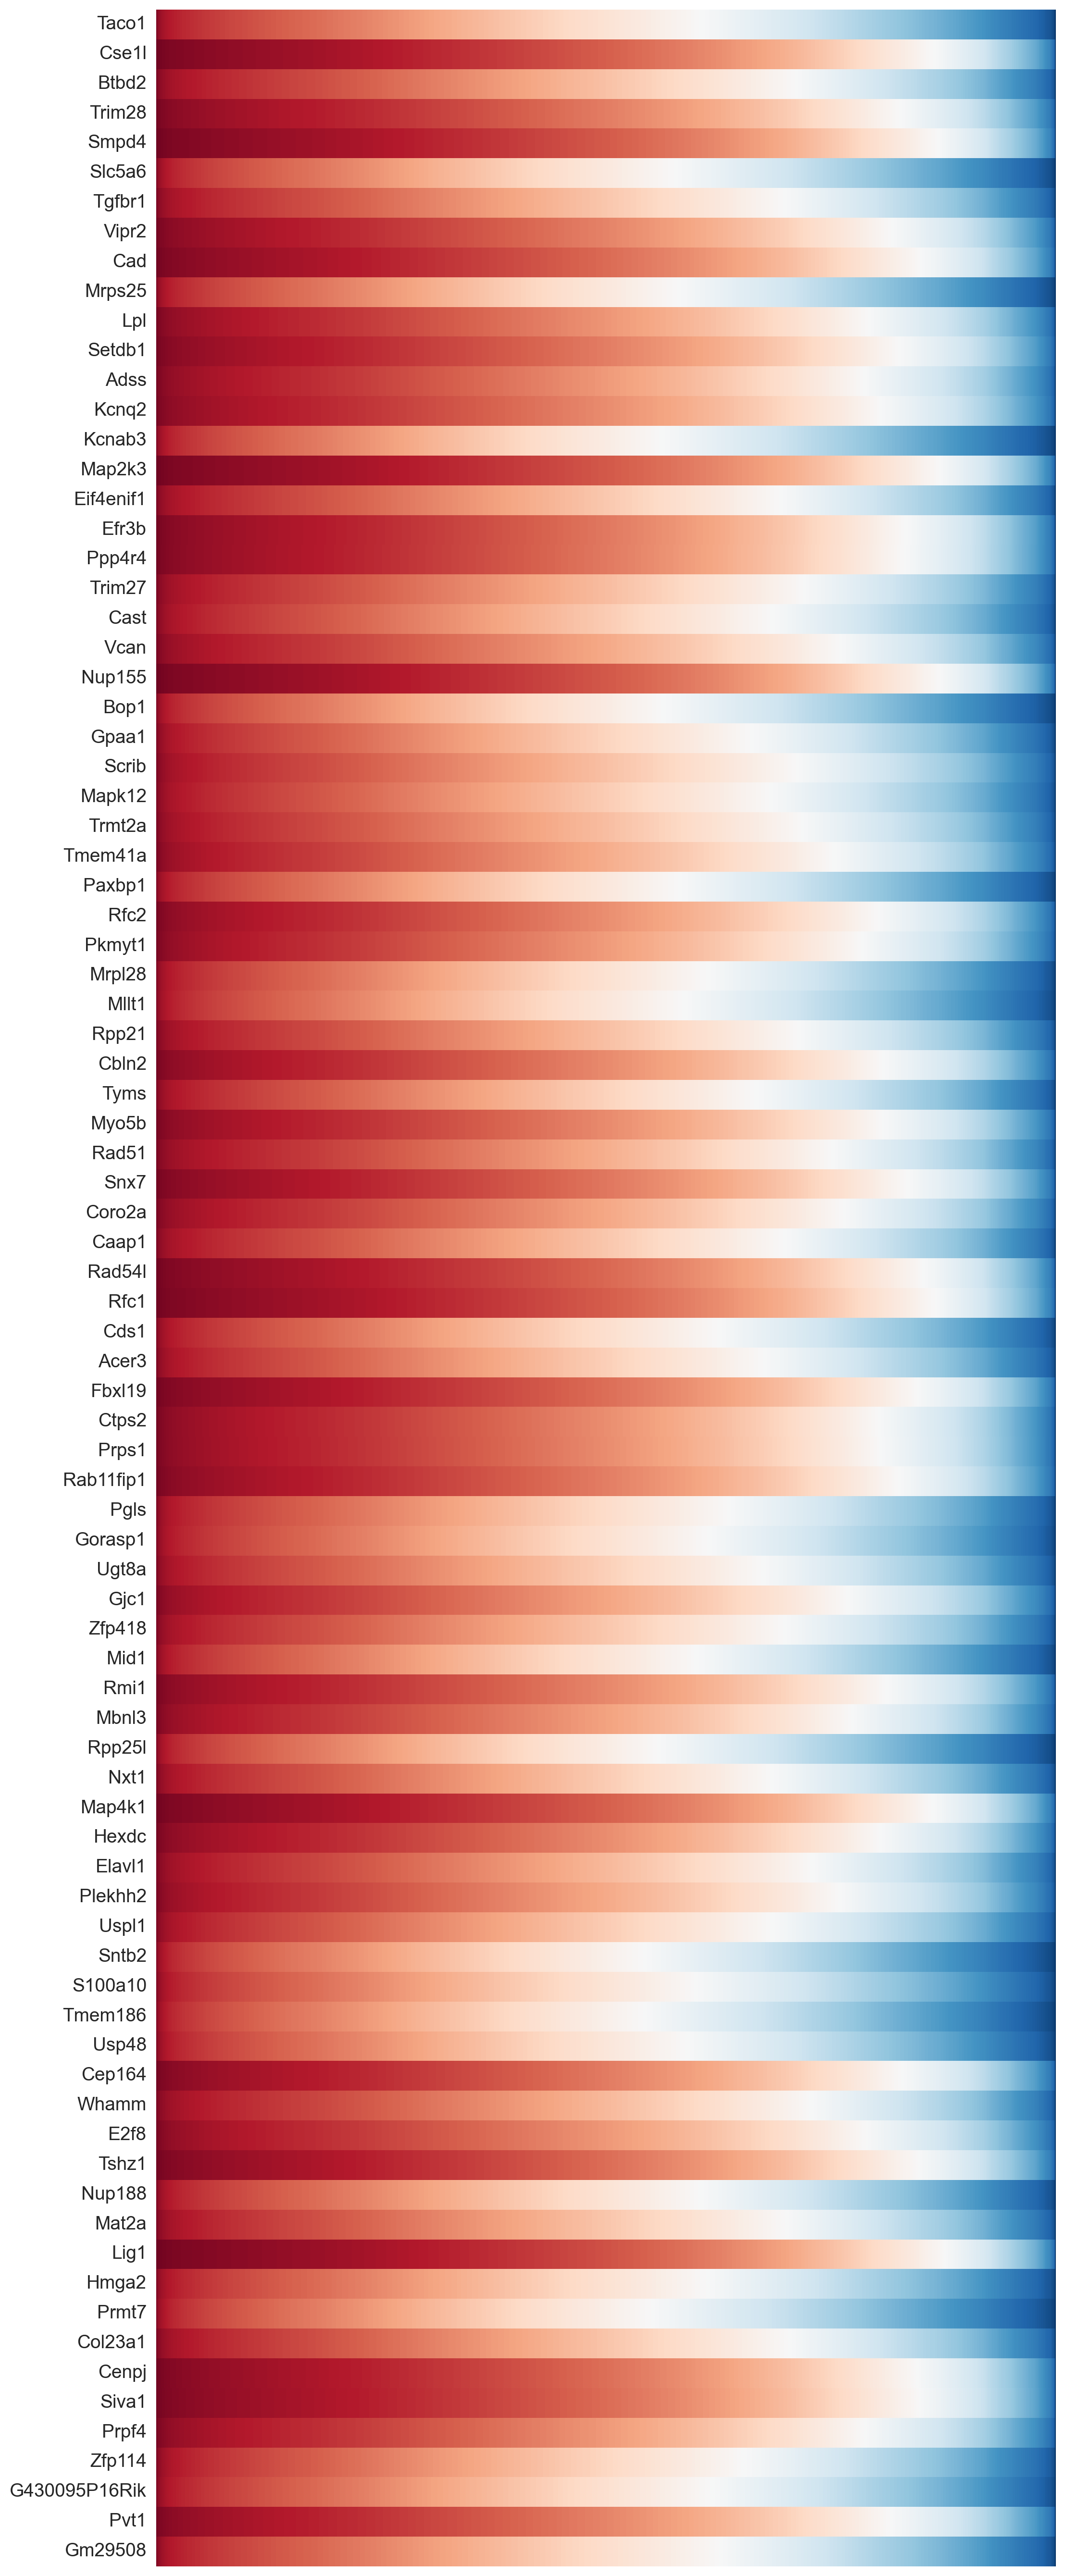

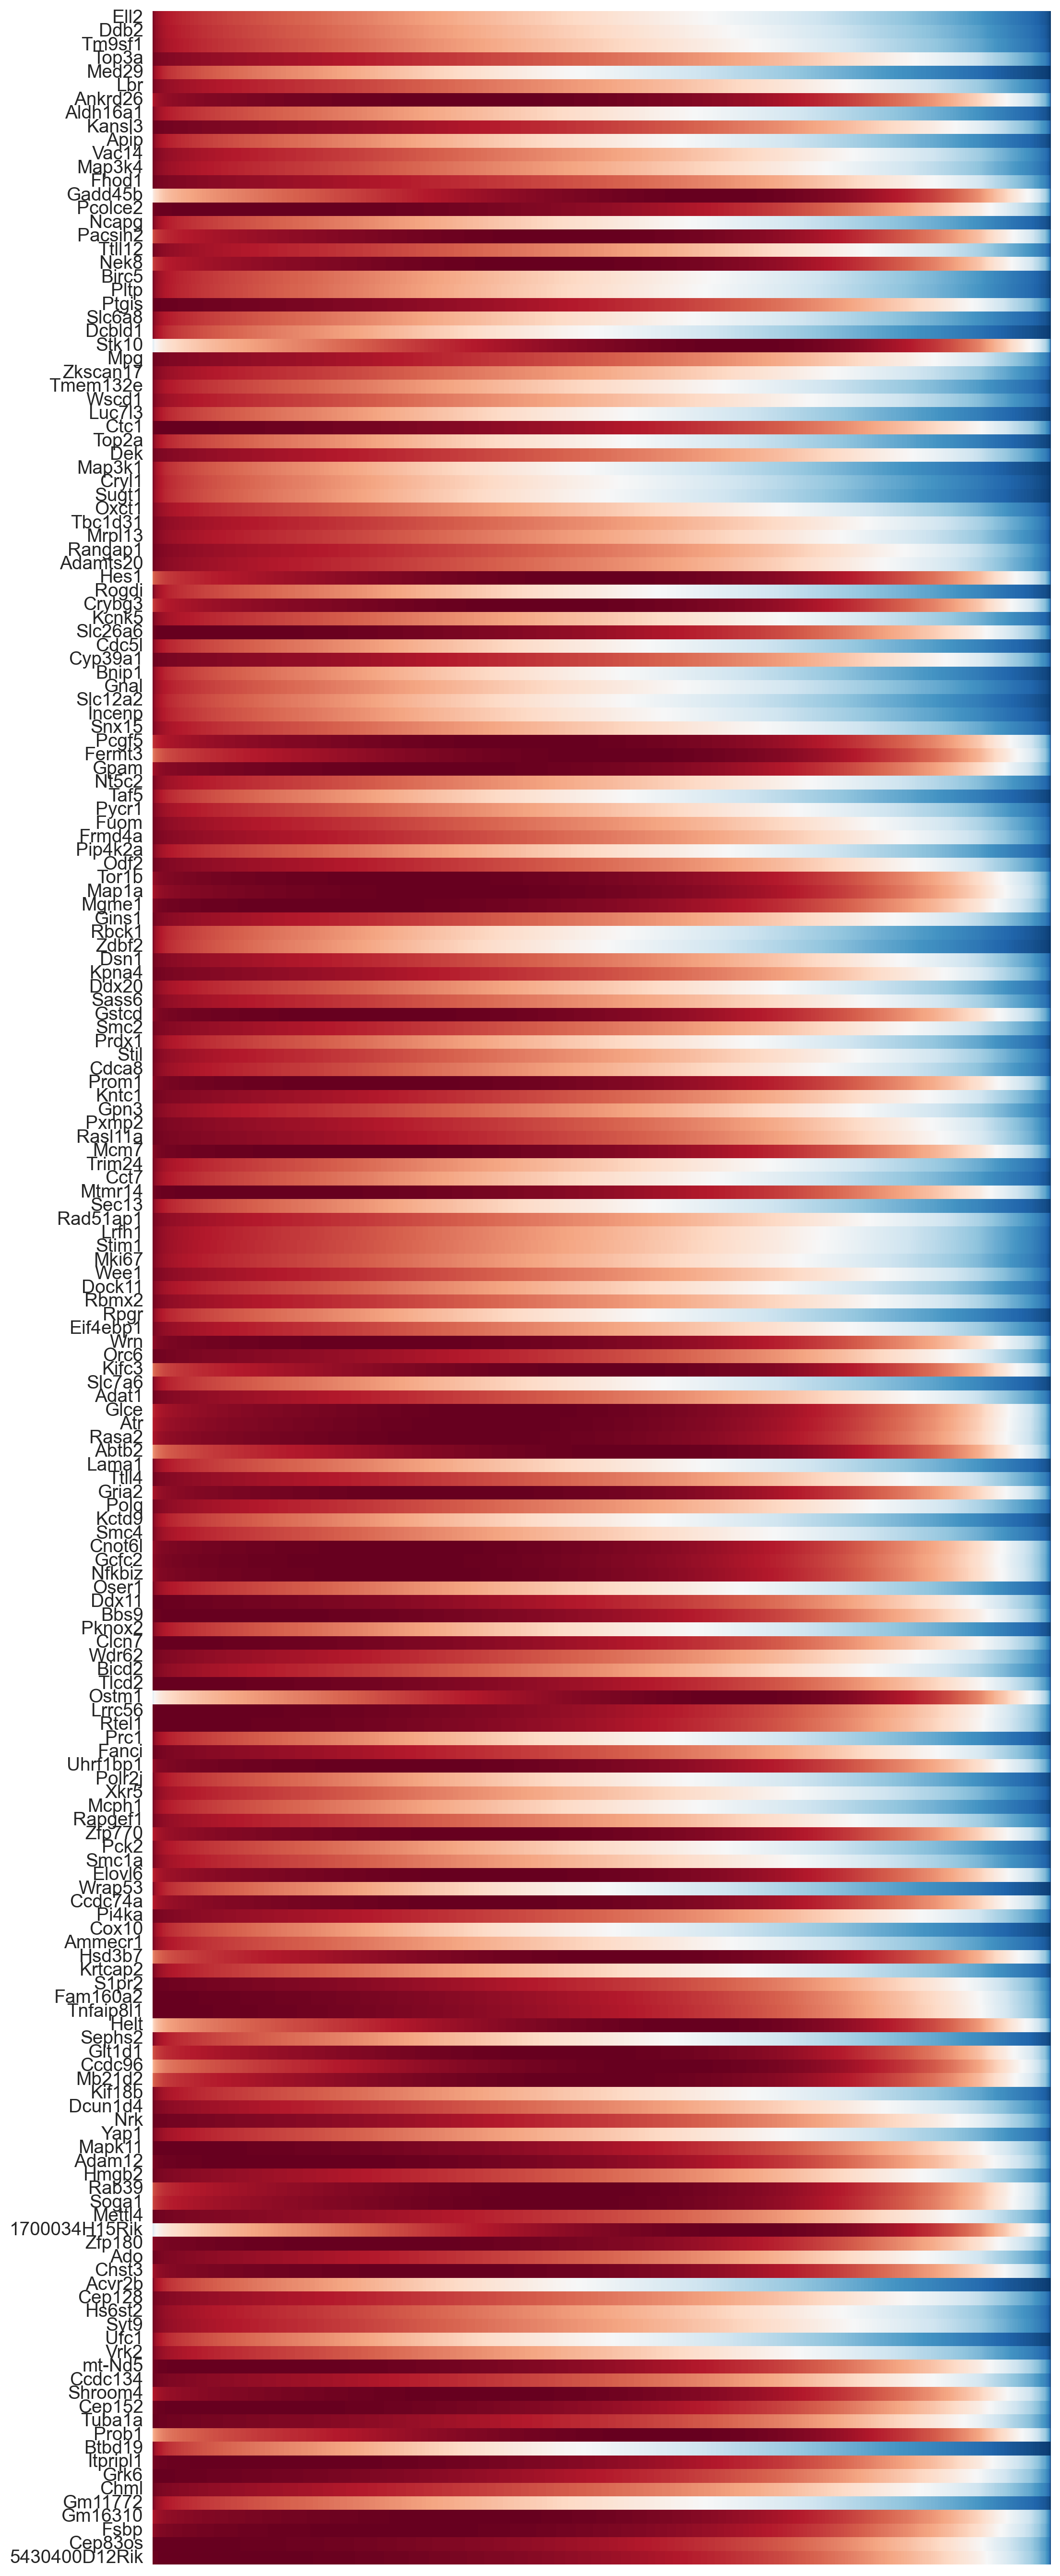

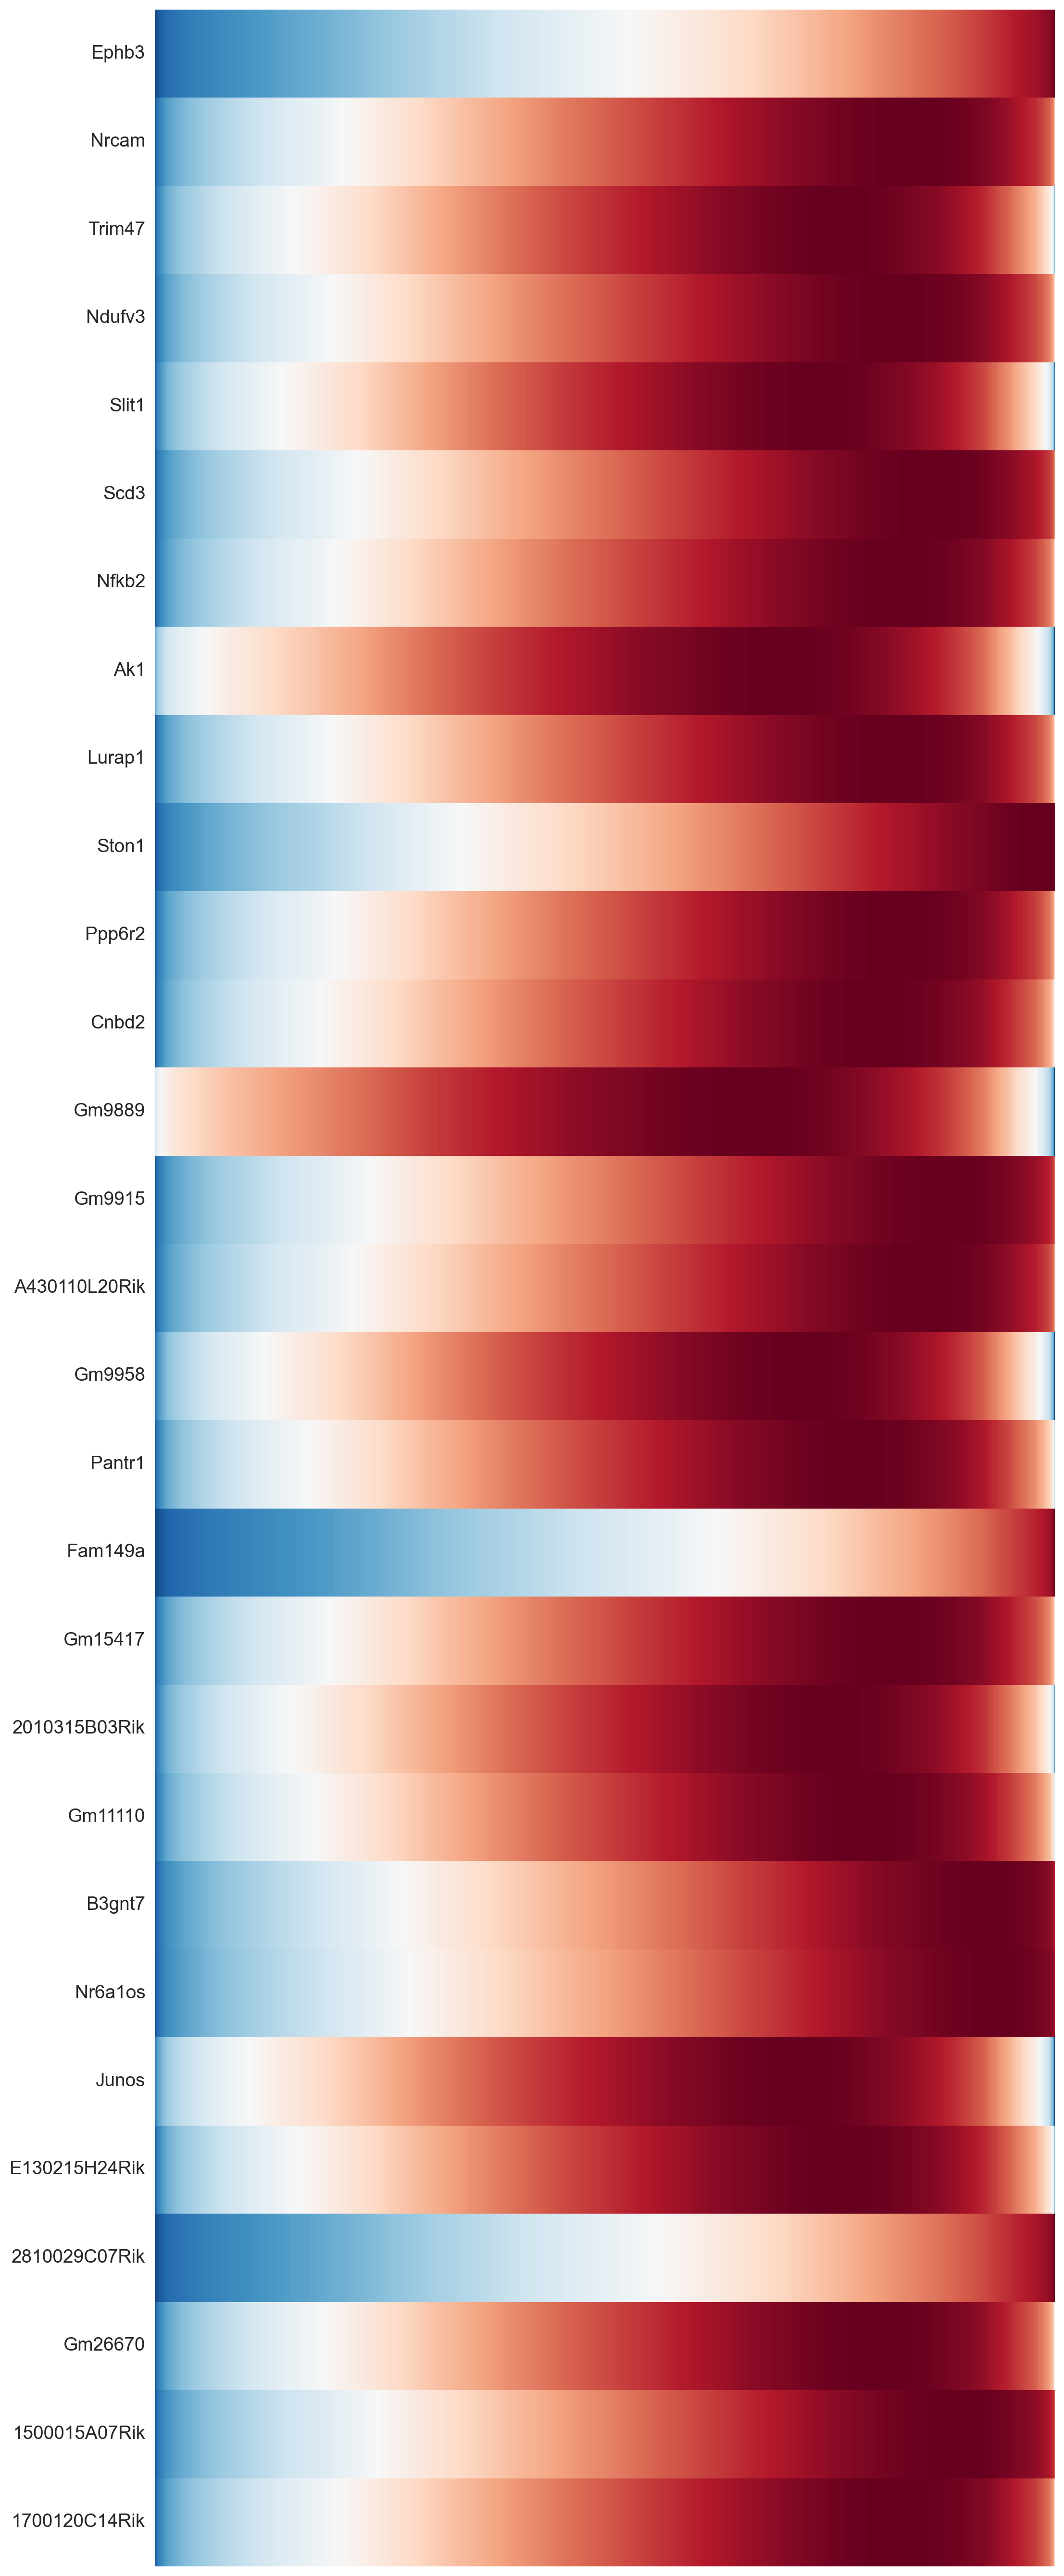

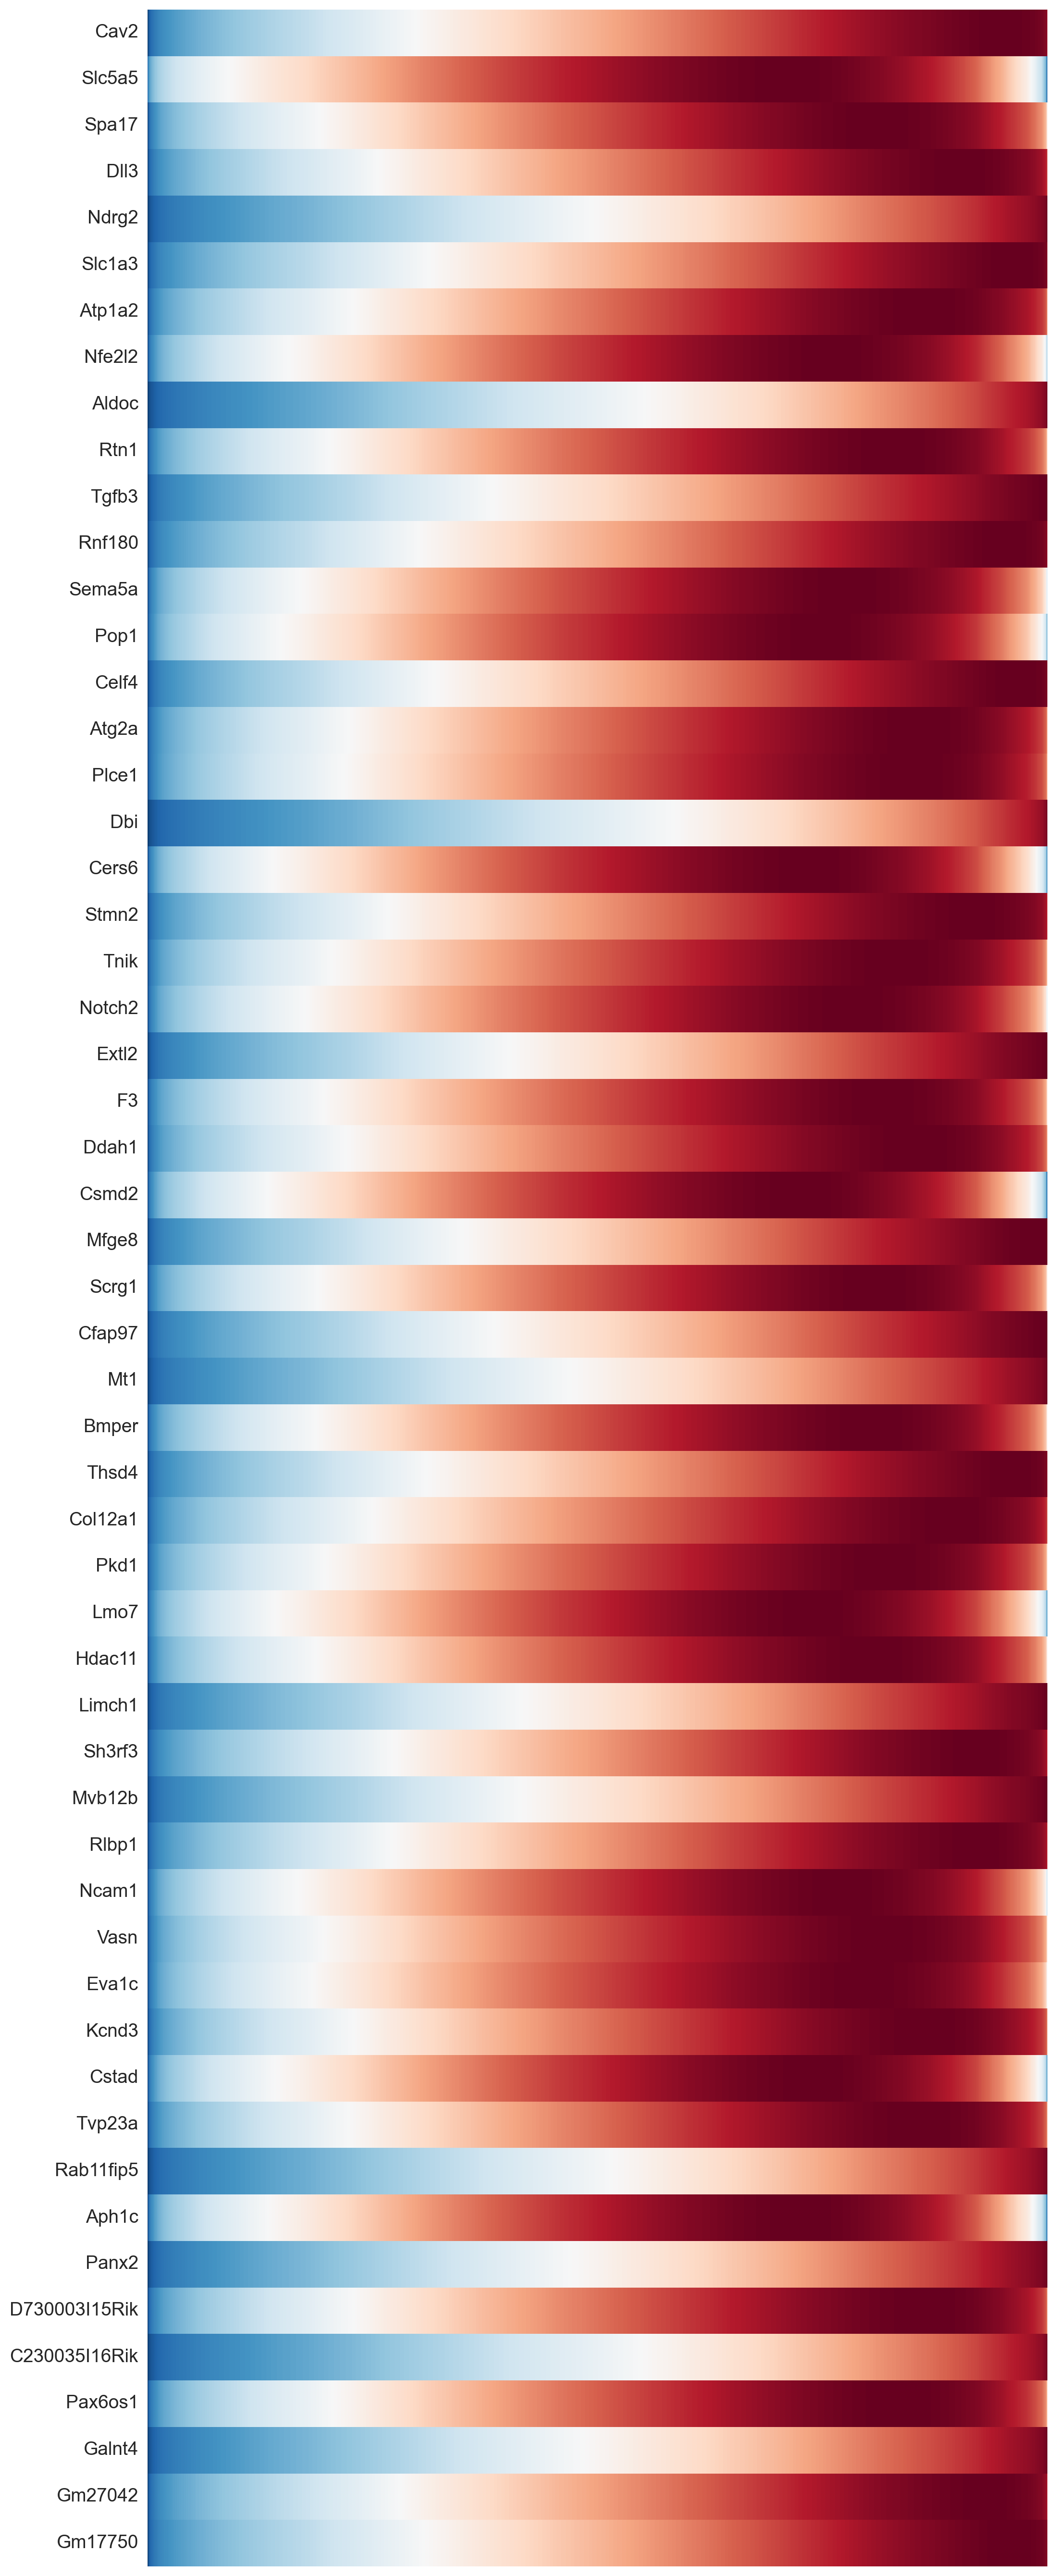

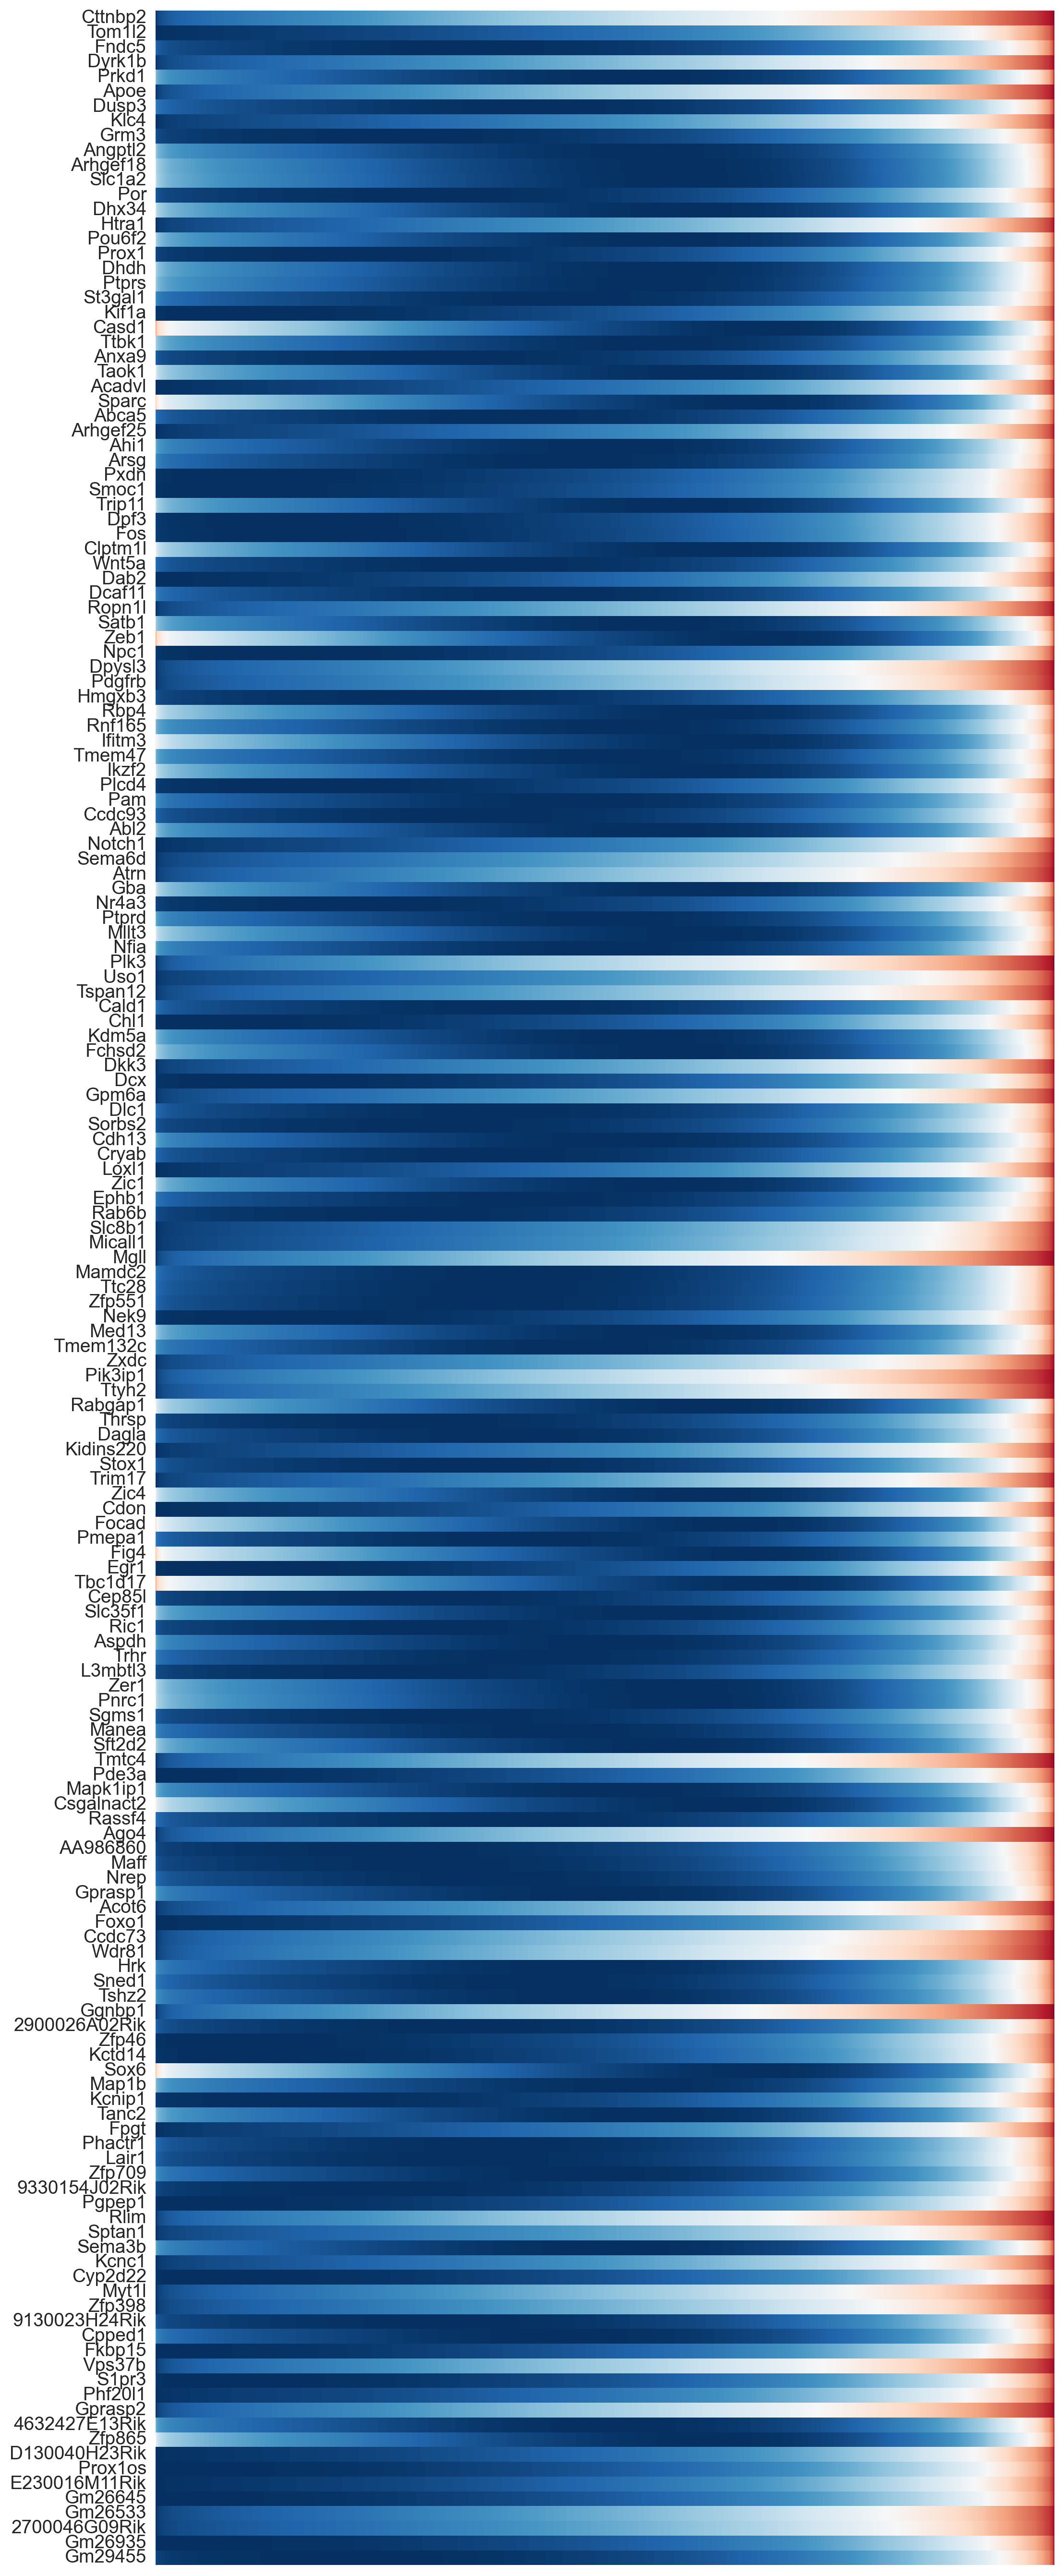

In [17]:
for i in range(1,7):
    plt.figure(figsize = (12,35))
    p = sns.heatmap(d_new[wave[wave['Dynamics type '].isin([i])]['Gene symbol'].to_list()].T,cmap = 'RdBu_r',
               vmin = -1, vmax = 1,yticklabels = True, cbar = False)
    p.set_xticks([])
    #p.set_yticks([])
    print('./Telley wave/plot2/CT_W'+str(i)+'.pdf')

    plt.savefig('./Telley wave/plot2/CT_W'+str(i)+'.pdf')

In [18]:
del adata

In [19]:
adata = sc.read_h5ad('AP_KO_BRN12.h5ad')
adata = adata[adata.obs['Batch']!=1,:]
adata.var_names_make_unique()

adata.layers['plot'] = np.log1p(adata.X)
adata.layers['count'] = adata.X.copy()

adata.obs['Batch'] = adata.obs['Batch'].astype('category')
adata.obs['age.x'] = adata.obs['age.x'].astype('category')

adata.obs['pseudotime'] = pd.read_csv('ko_pseudotime_similarity.csv')['pseudotime'].to_list()

c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:896: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._set_dim_index(names, "var")


In [20]:
d = pd.DataFrame(adata[:,gene].layers['plot'].todense())
d.columns = gene
d['pseudotime'] = adata.obs['pseudotime'].to_list()
d = d.sort_values(by = 'pseudotime')

In [21]:
d_new = []
for i in gene:
    spl = UnivariateSpline(d['pseudotime'], d[i],k=2,bbox = [-0.1,1.1])
    fit = spl(d['pseudotime'])
    #fit = (fit - fit.mean())/abs((fit-fit.mean())).max()
    fit = (fit - (fit.max()+fit.min())/2)/(fit.max()-fit.min())*2
    d_new.append(fit)

In [22]:
d_new = pd.DataFrame(d_new).T
d_new.columns = gene

./Telley wave/plot2/KO_W1.pdf
./Telley wave/plot2/KO_W2.pdf
./Telley wave/plot2/KO_W3.pdf
./Telley wave/plot2/KO_W4.pdf
./Telley wave/plot2/KO_W5.pdf
./Telley wave/plot2/KO_W6.pdf


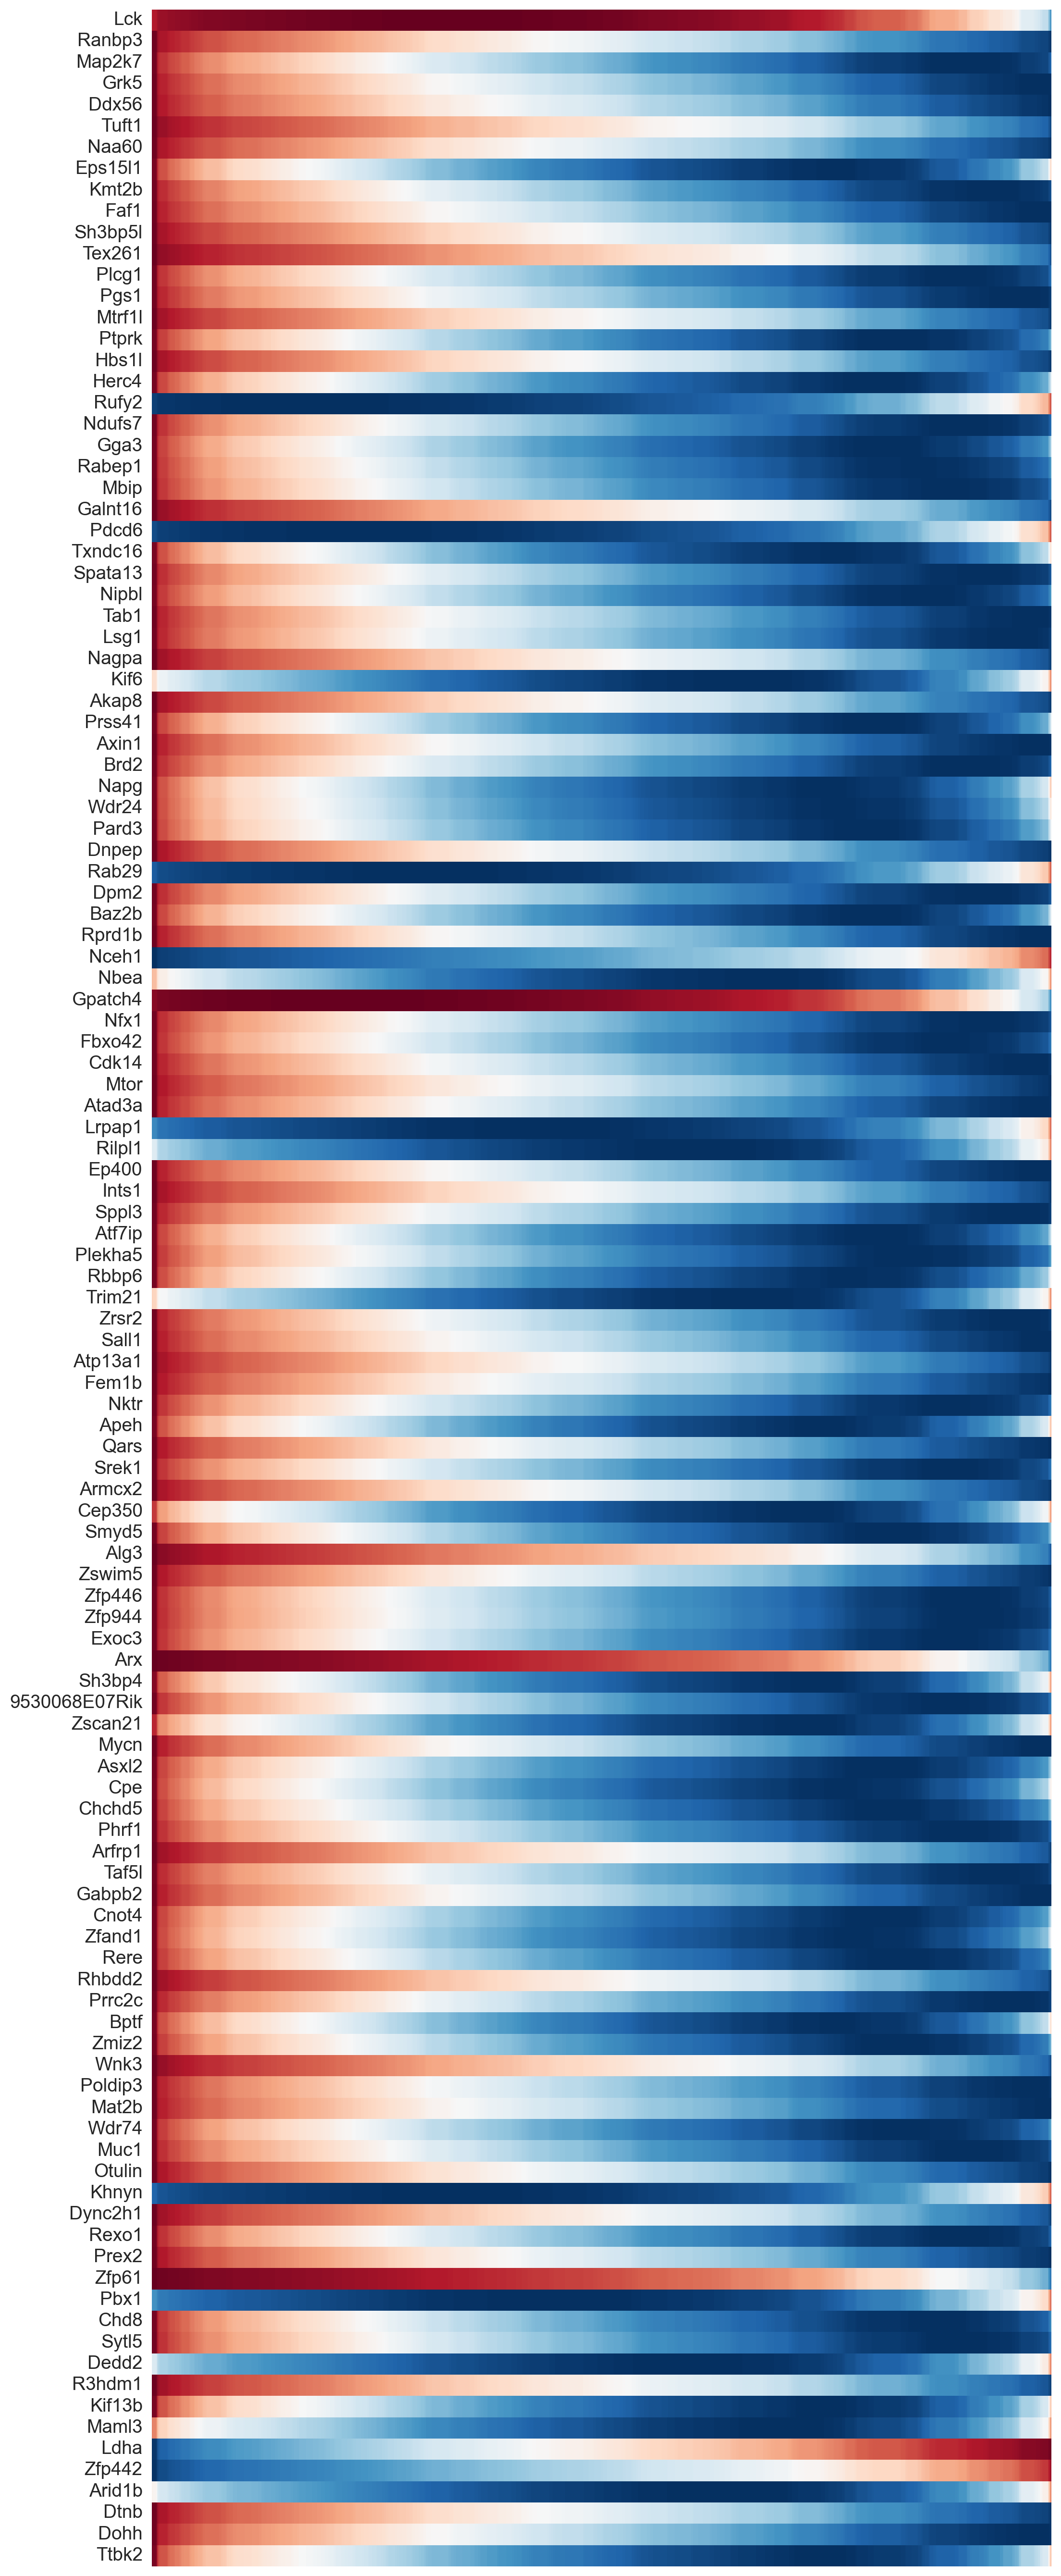

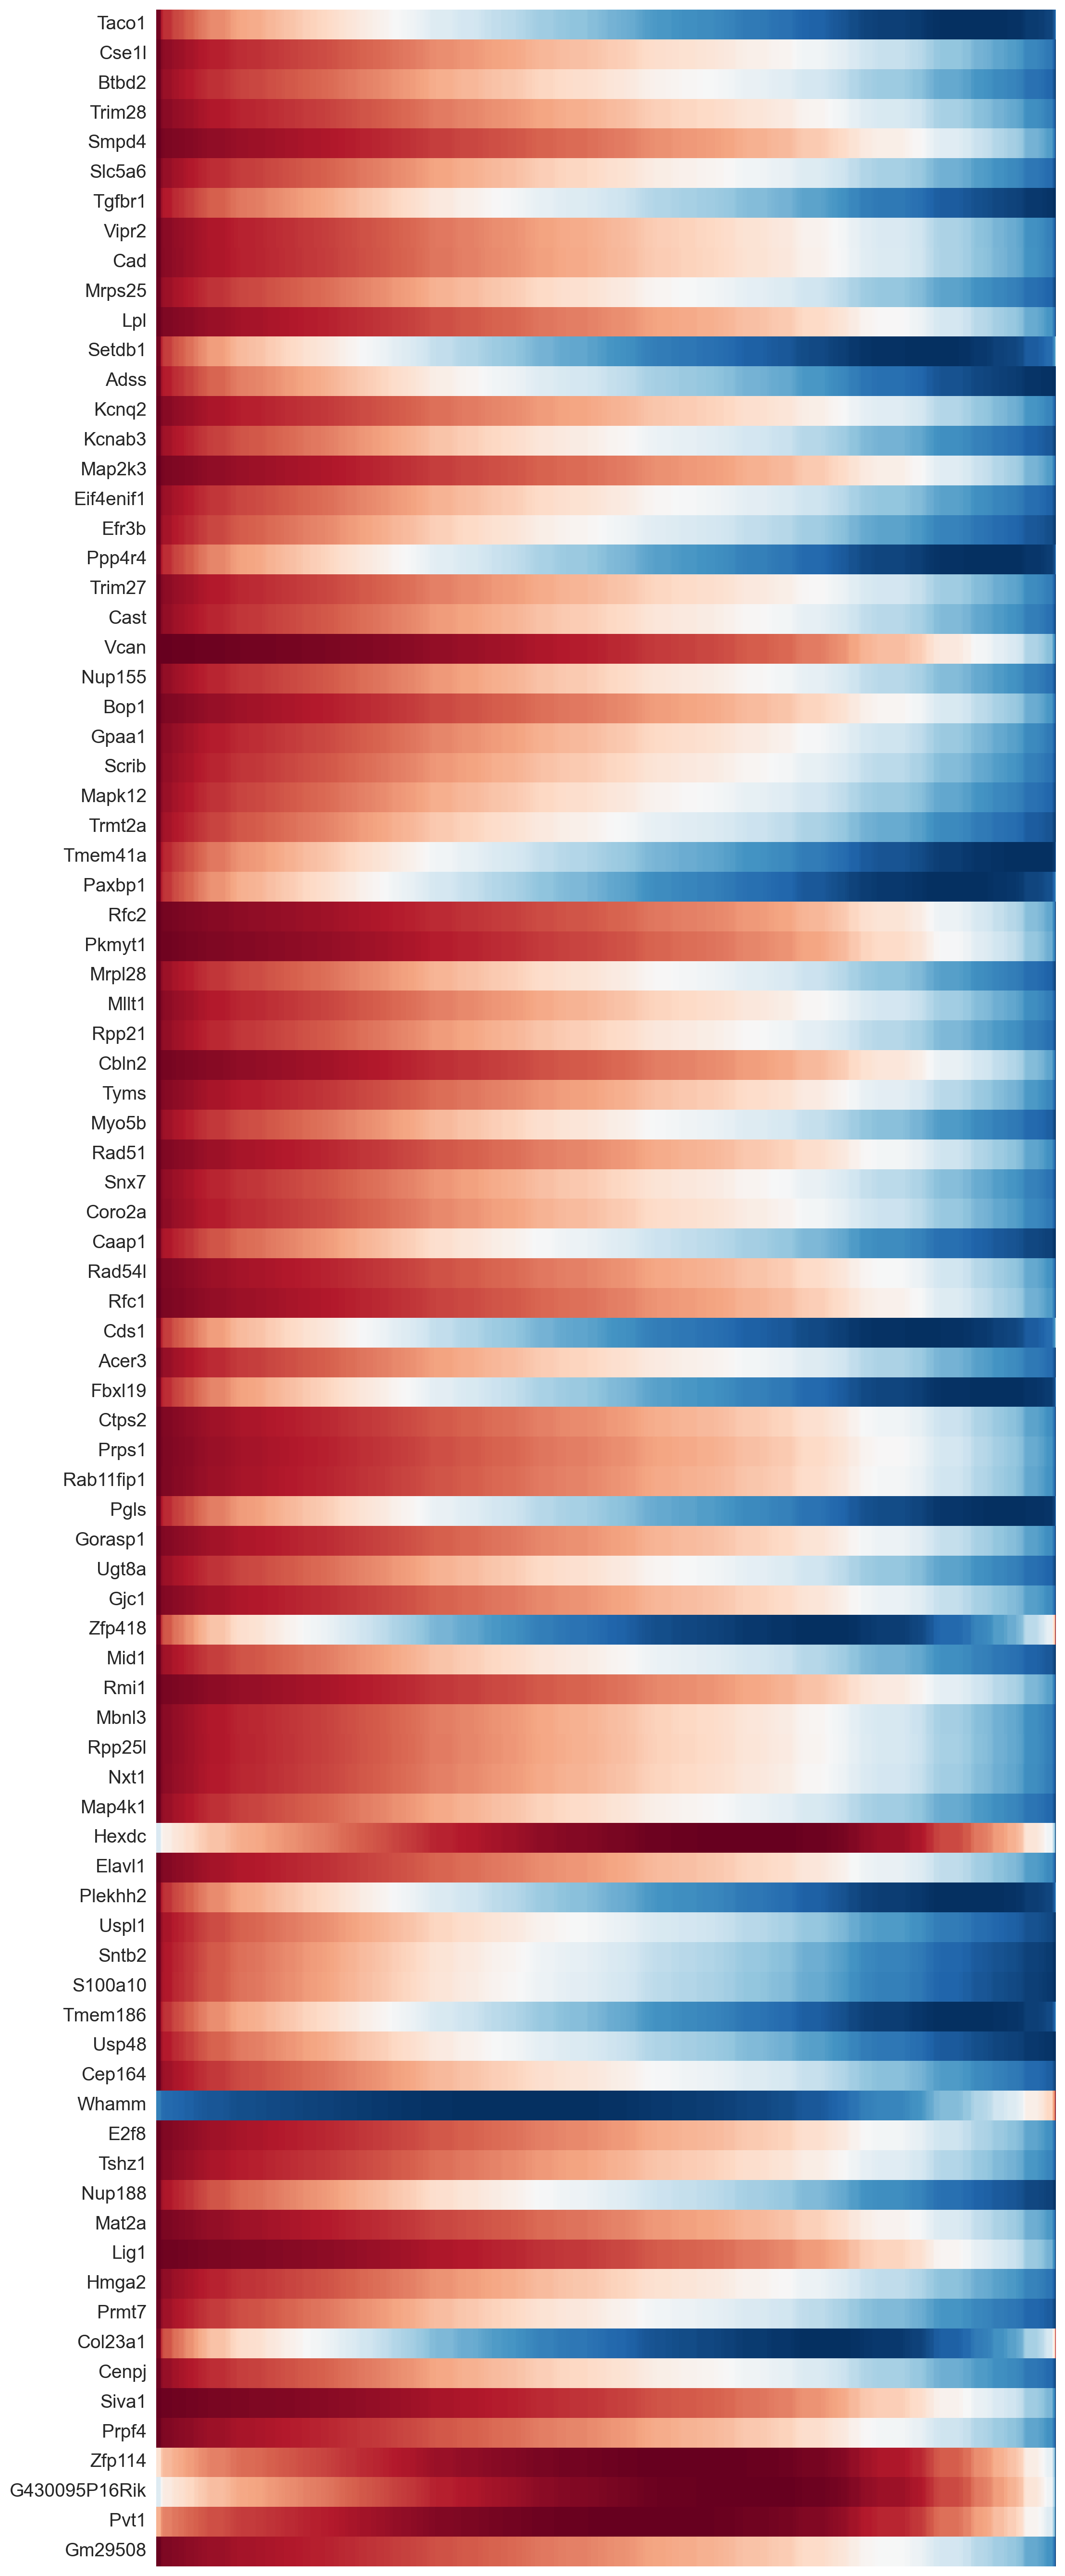

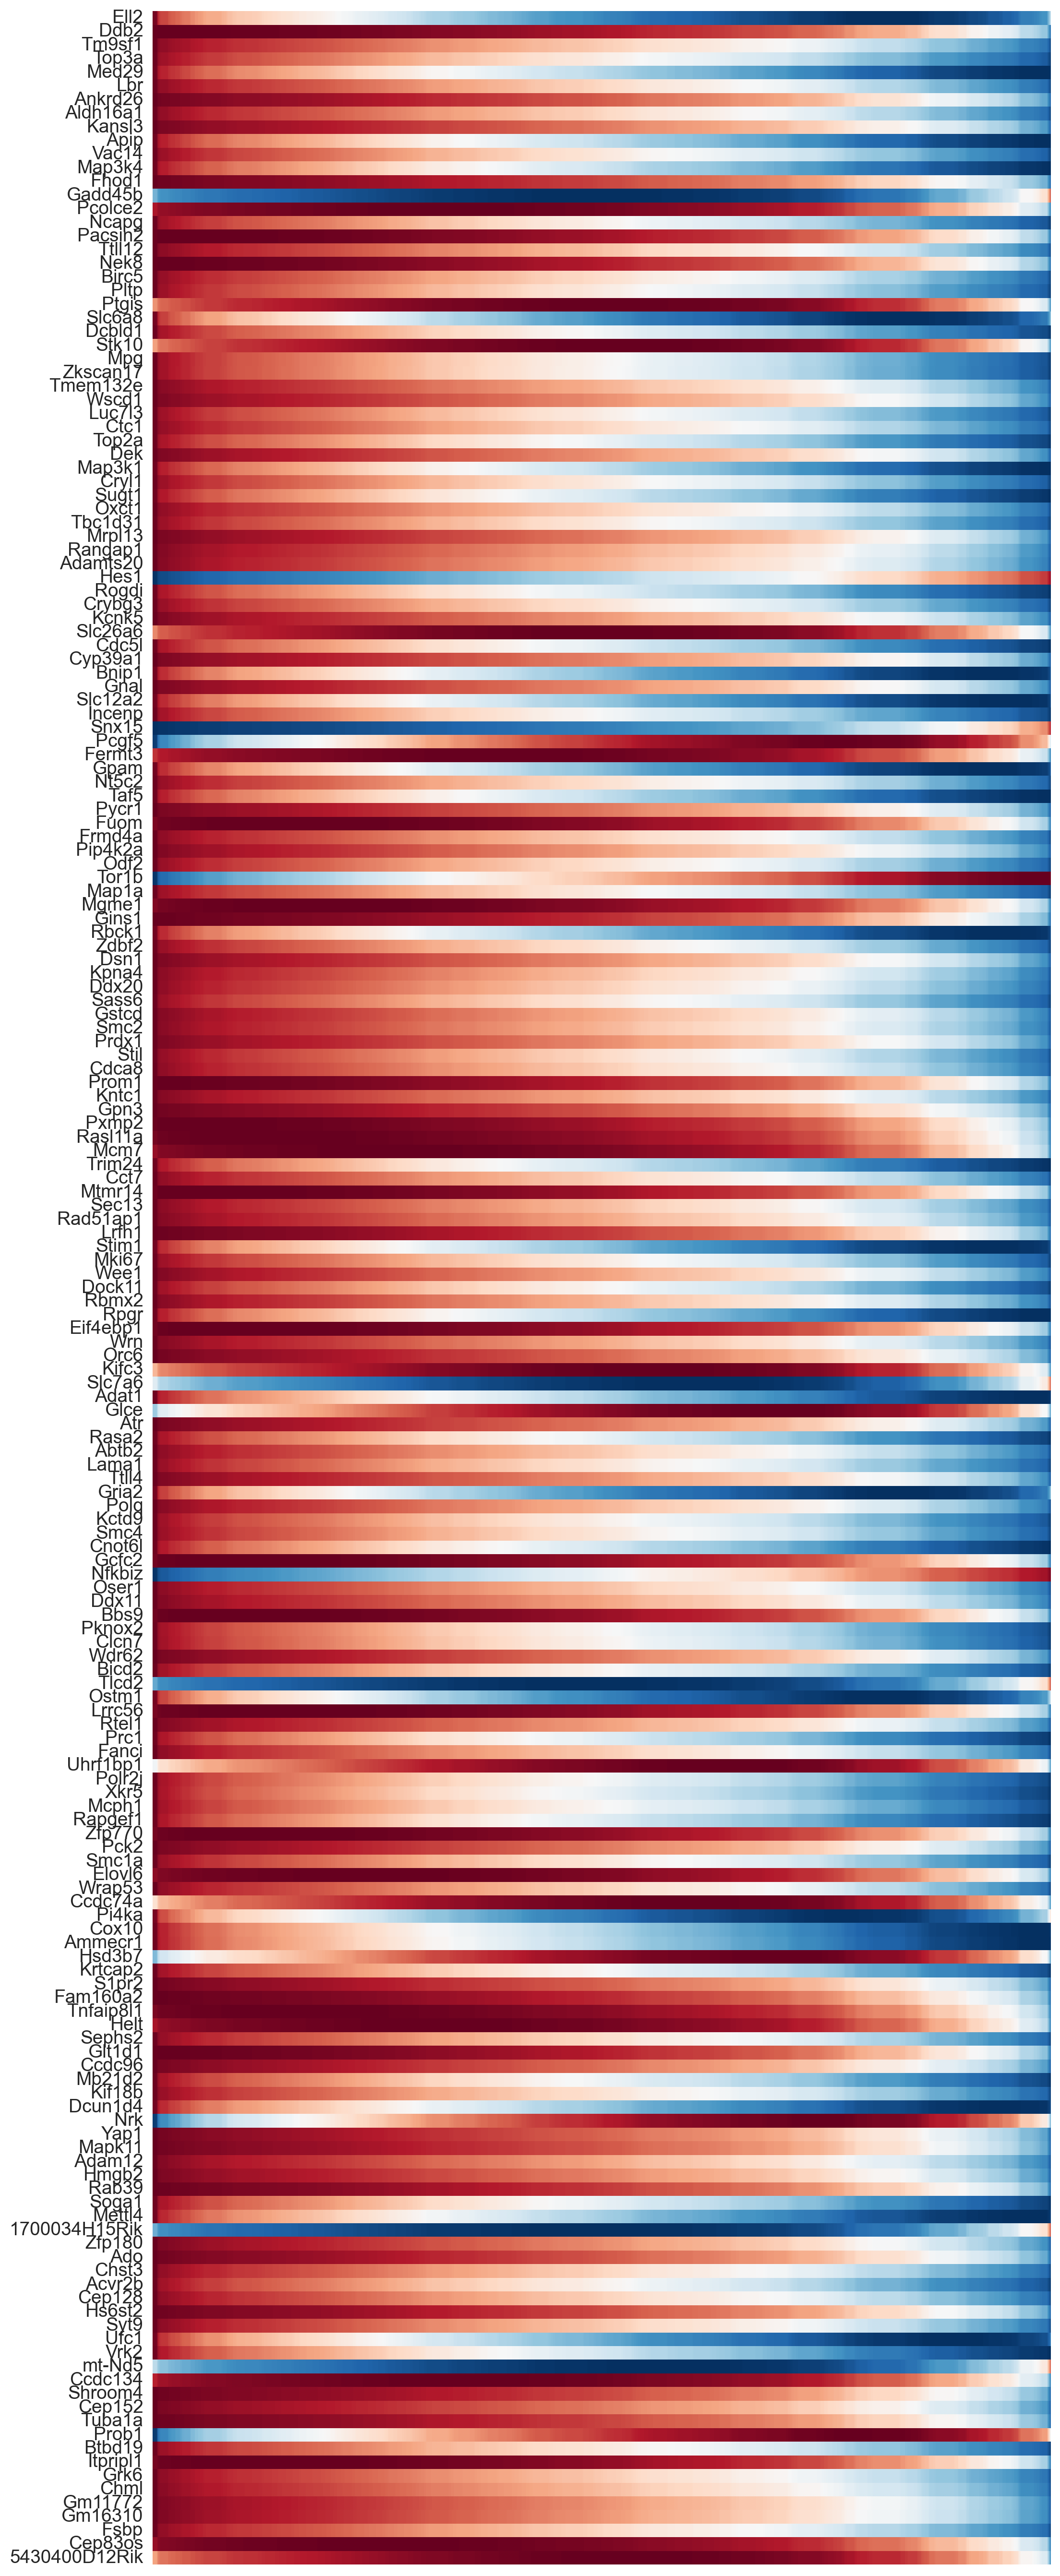

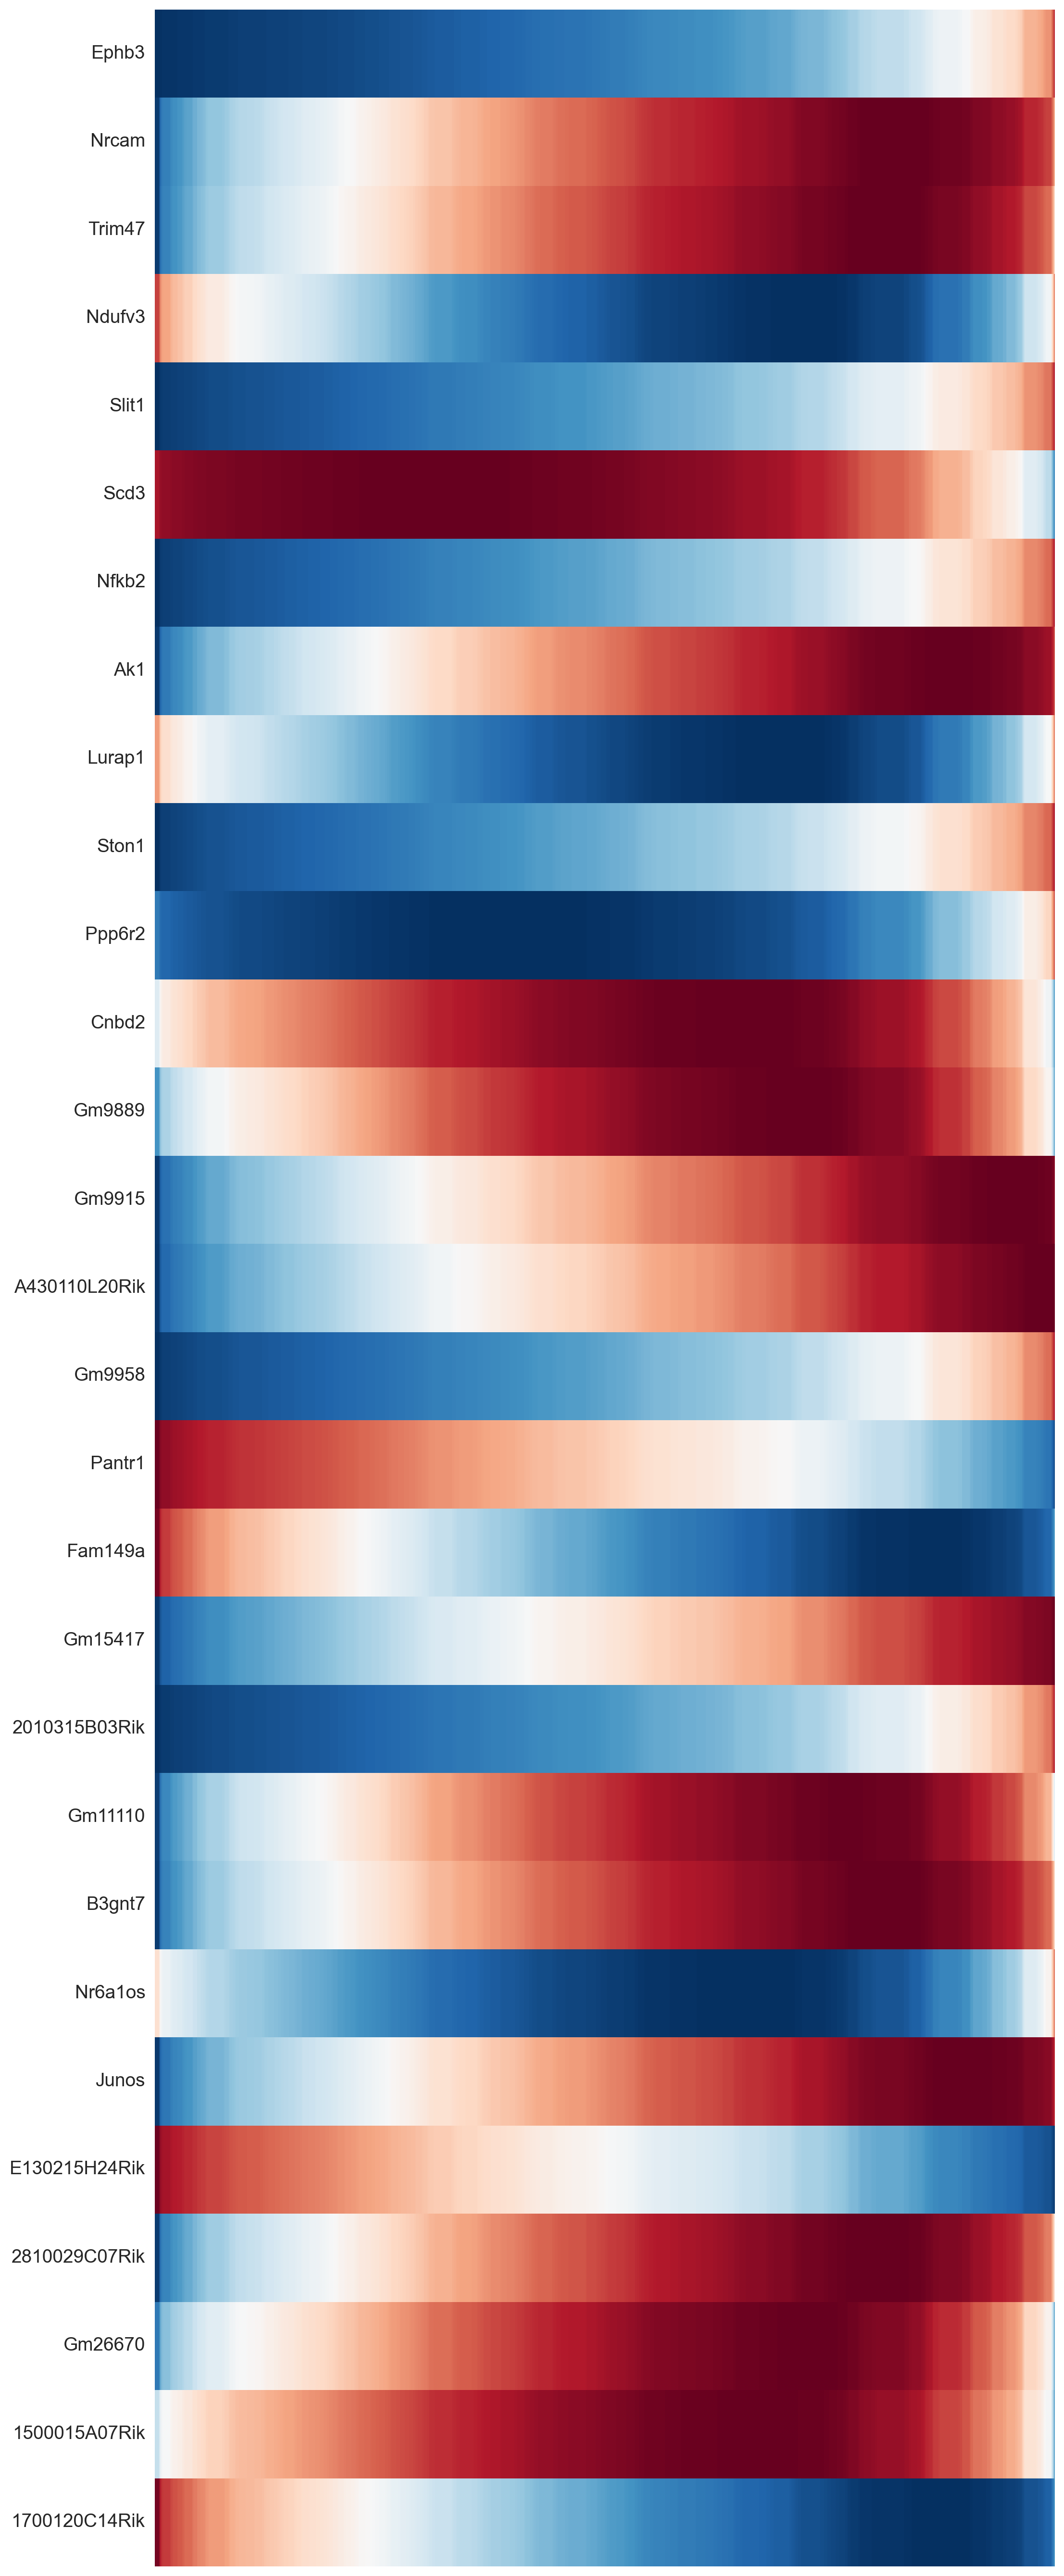

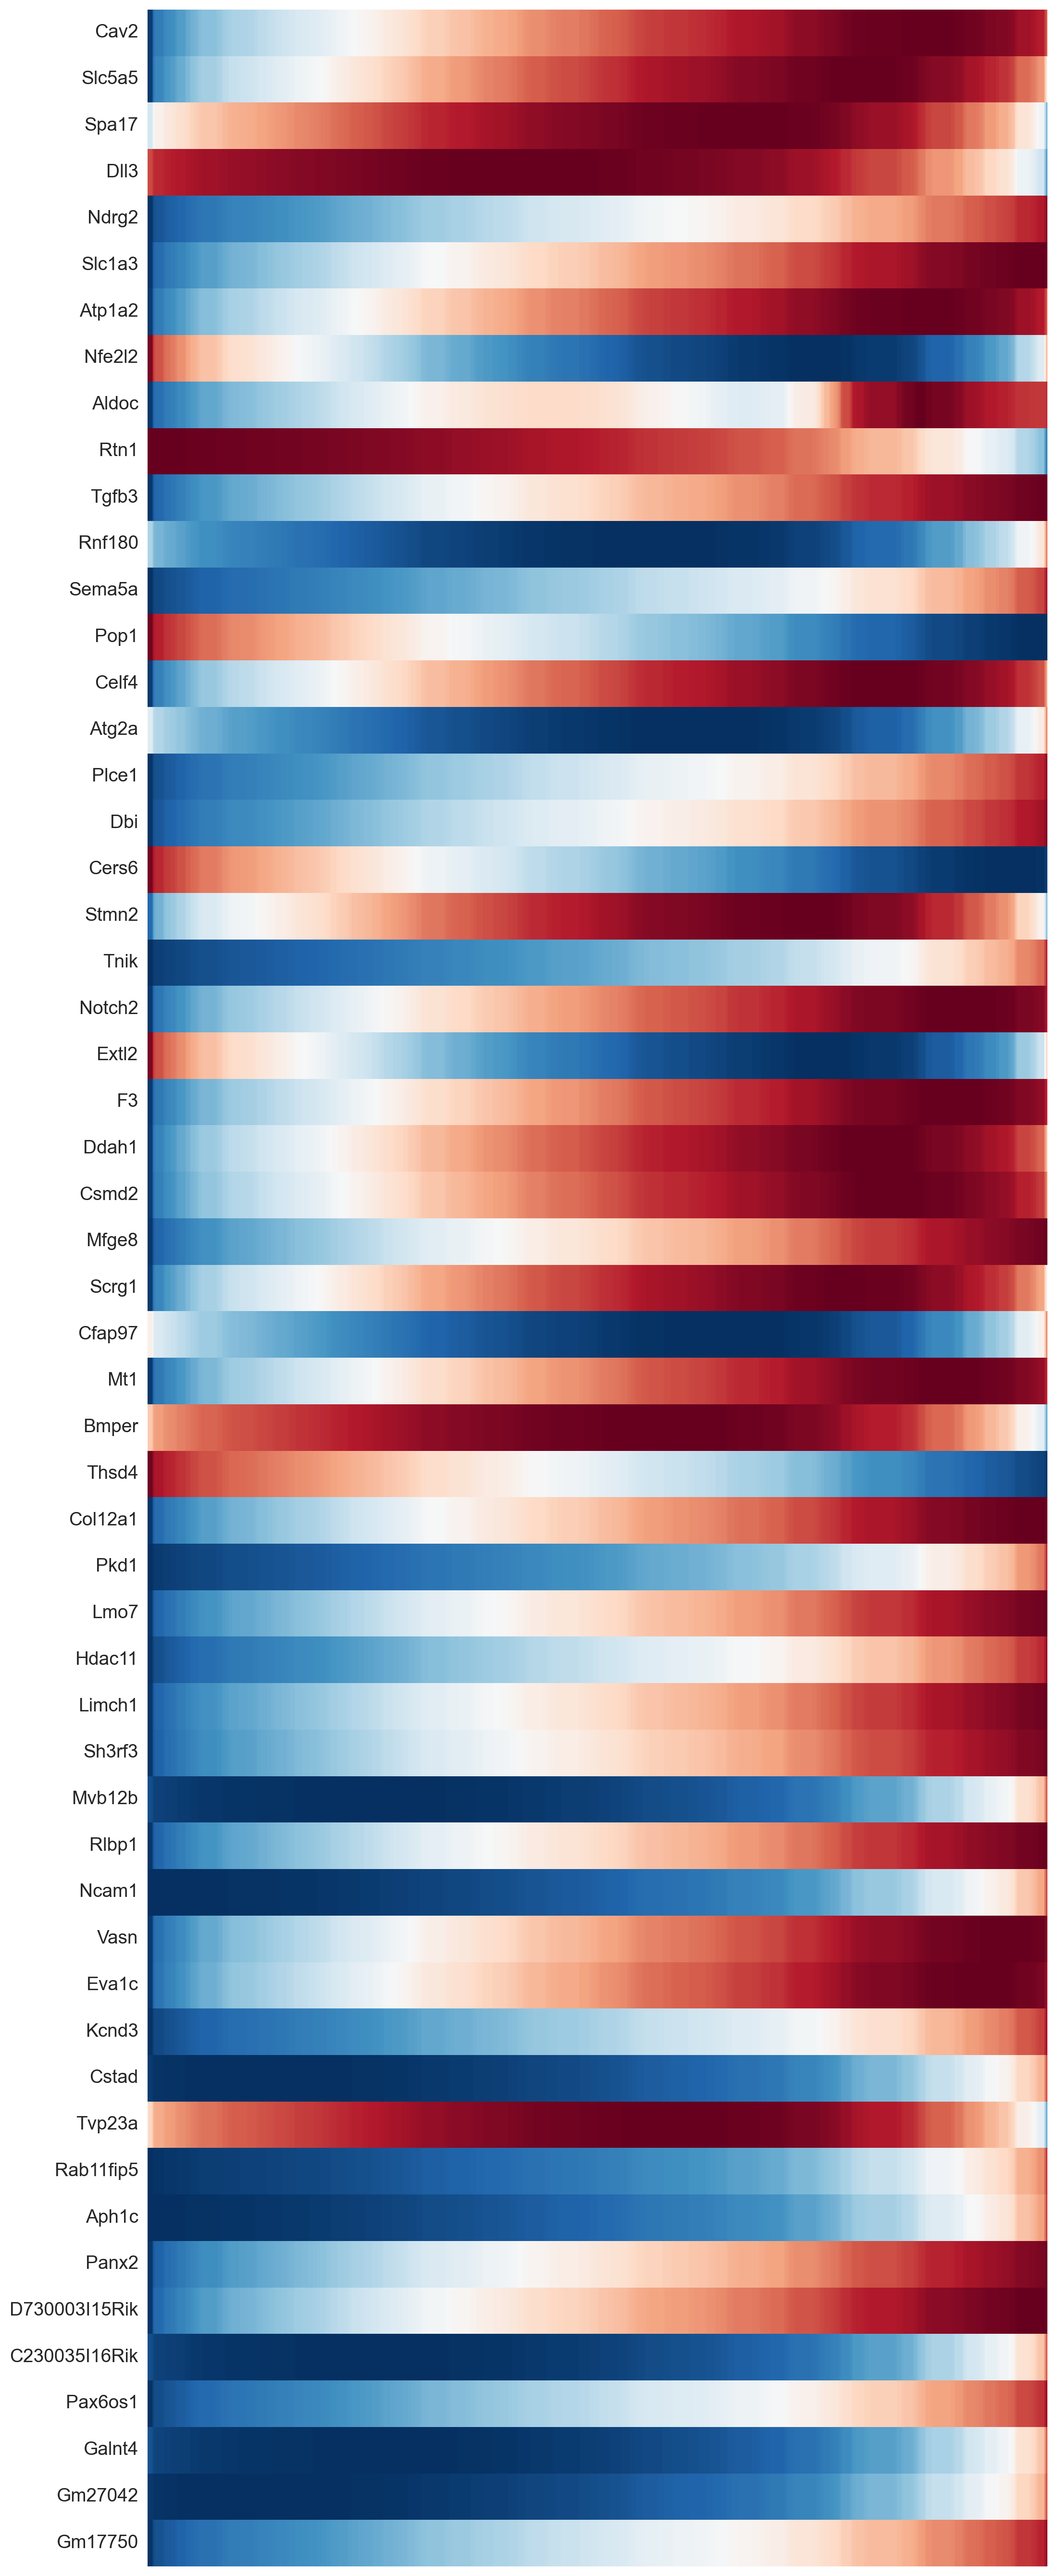

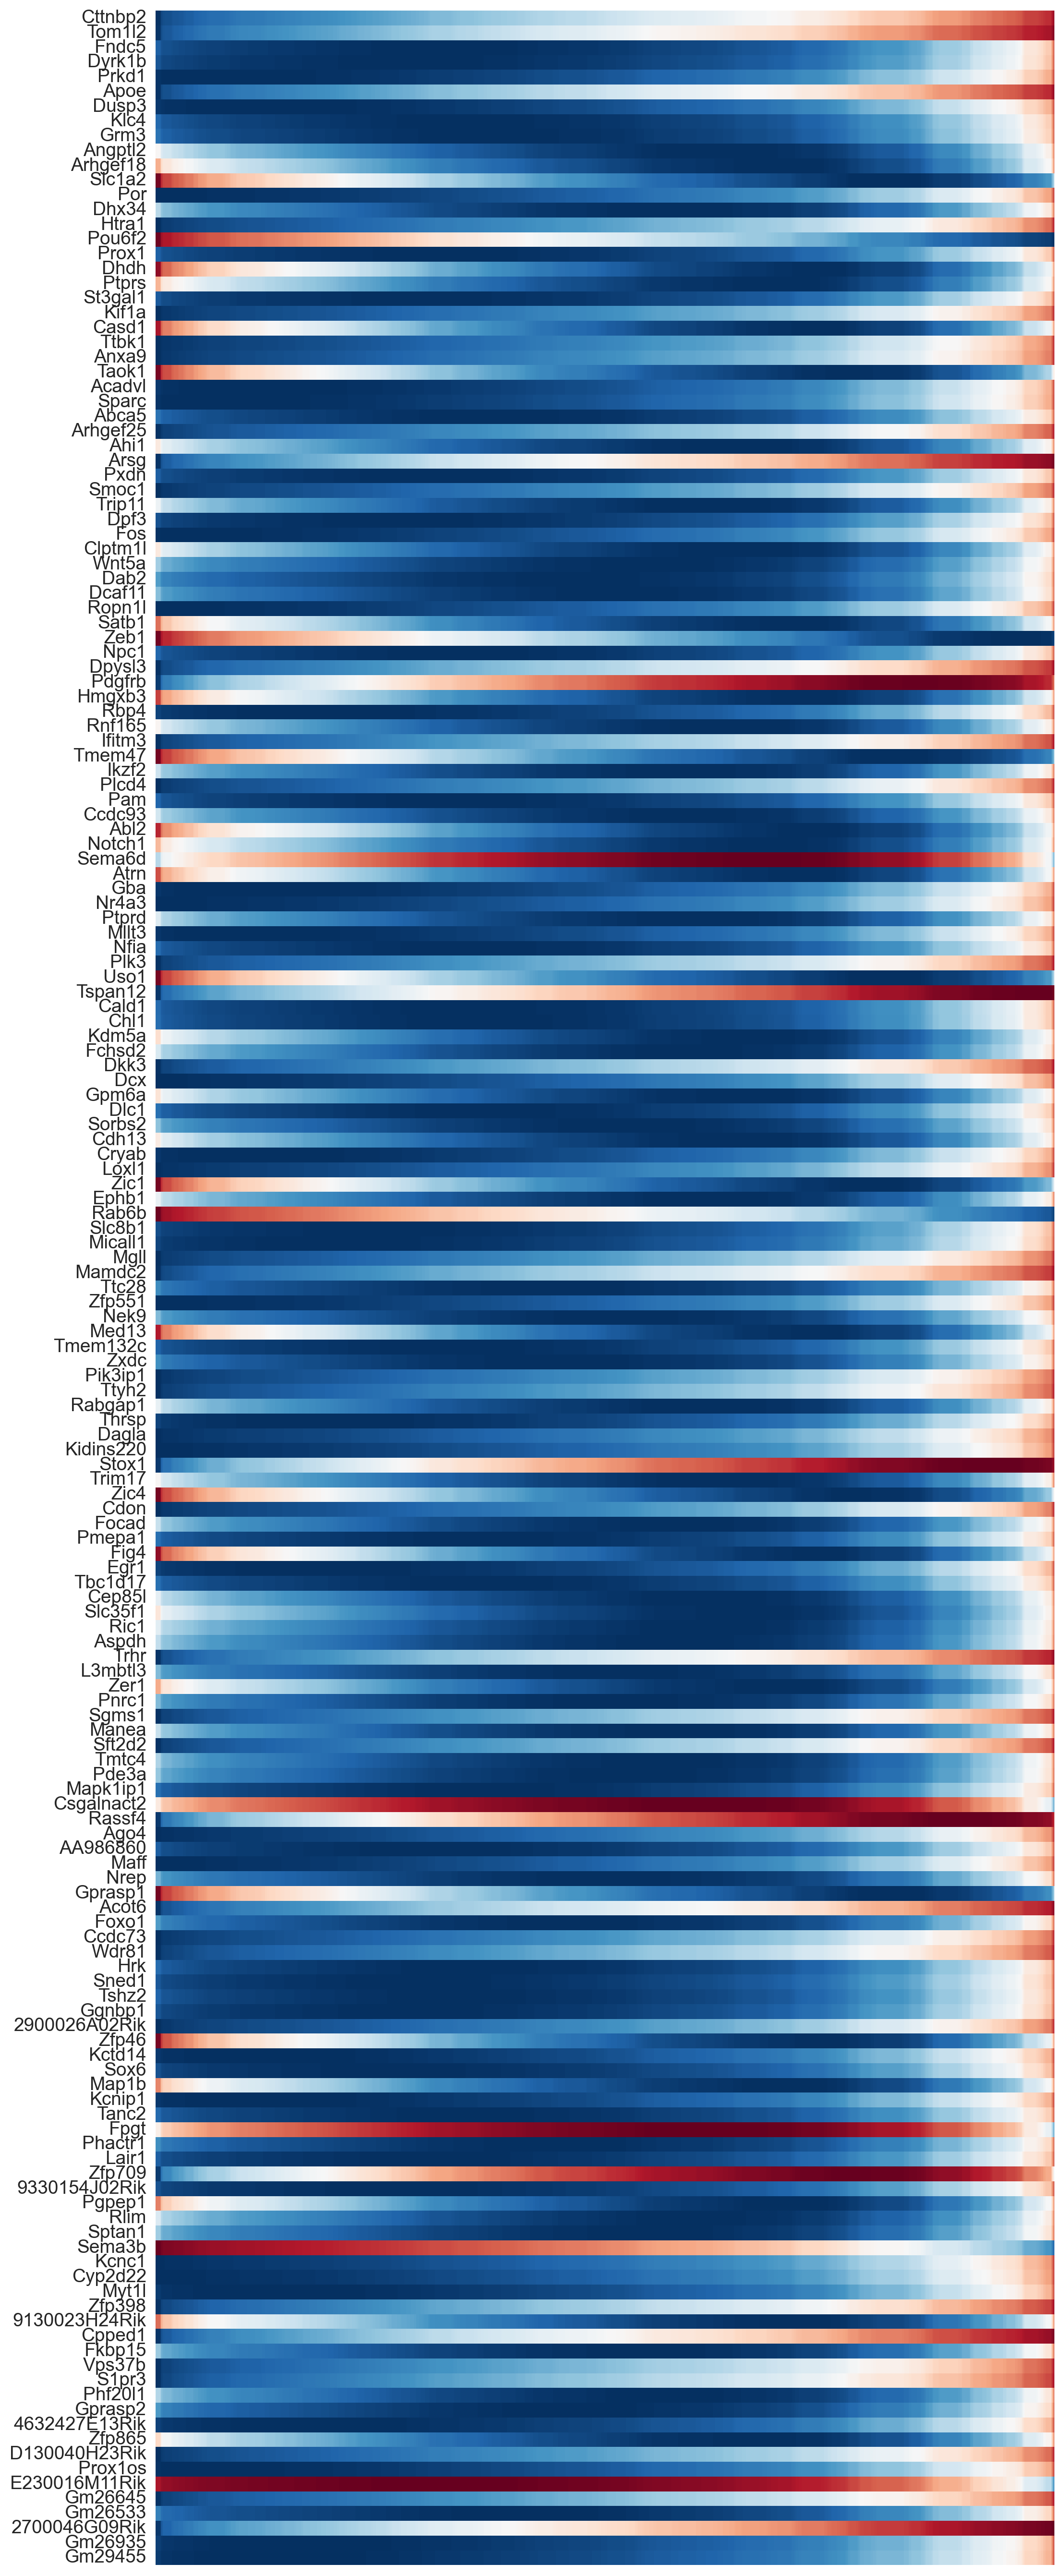

In [23]:
for i in range(1,7):
    plt.figure(figsize = (12,35))
    p = sns.heatmap(d_new[wave[wave['Dynamics type '].isin([i])]['Gene symbol'].to_list()].T,cmap = 'RdBu_r',
               vmin = -1, vmax = 1,yticklabels = True, cbar = False)
    p.set_xticks([])
    #p.set_yticks([])
    print('./Telley wave/plot2/KO_W'+str(i)+'.pdf')

    plt.savefig('./Telley wave/plot2/KO_W'+str(i)+'.pdf')